In [63]:
import matplotlib.pyplot as plt
from matplotlib. patches import Polygon
import numpy as np
from math import pi
from IPython.display import display
from math import pi

array([[530.        , 270.        ],
       [580.        , 270.        ],
       [555.        , 313.30127019]])

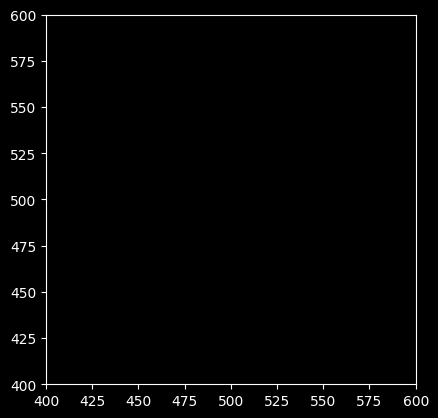

In [67]:
f, a = plt.subplots()
a.set_xlim([400, 600])
a.set_ylim([400, 600])
a.set_aspect(1)
t = Triangle(530, 270, 50)
t.draw(a)
t.coords


In [64]:
class Figure:
    coords = np.array([])

    def __init__(self, x, y, *side, color='cyan'):
        self.color = color
        if len(side) > 1:
            a = np.array([x, y])
            b = np.array(side[:2])
            # b сверху
            if y > b[1]:
                a, b = b, a
            v = b-a
            self.side = sum(v**2)**0.5
            angle = np.math.atan(v[1]/v[0])*180/pi
            if side[2] == 0:
                self.set_coords(*a, self.side)
                self.rotate(angle, *a)
            else:
                self.set_coords(*b, self.side)
                self.rotate(angle-180, *b)
            print(angle)
        else:
            self.side = side[0]
            self.set_coords(x, y, self.side)

    def set_coords(self):
        ...

    def draw(self, ax):
        poly = Polygon(self.coords, fill=True, closed=True, color=self.color)
        ax.add_patch(poly)

    def rotate(self, angle, x=0, y=0):
        mat = np.array([
            [np.math.cos(angle*pi/180), -np.math.sin(angle*pi/180)],
            [np.math.sin(angle*pi/180), np.math.cos(angle*pi/180)]
        ])
        for n, cors in enumerate(self.coords):
            self.coords[n] = (mat @ (cors - [x, y])) + [x, y]

    def mirror(self, x=False, y=False):
        if x:
            self.coords[:, 0] *= -1
        if y:
            self.coords[:, 1] *= -1

    def move(self, x, y):
        self.coords[:, 0] += x
        self.coords[:, 1] += y

    def gom(self, delta):
        self.coords = self.coords / delta


In [65]:

class Triangle(Figure):
    def set_coords(self, x, y, side):
        self.coords = np.array([
            [x, y],
            [x+side, y],
            [x+side/2, y+side*3**0.5/2],
        ])


45.0


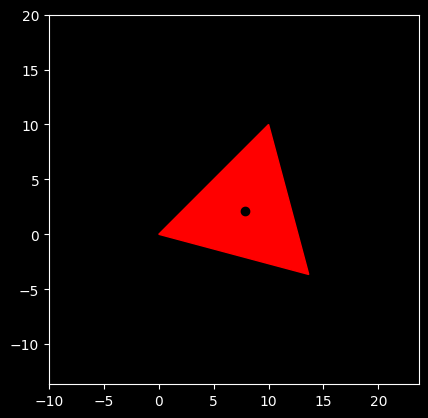

In [66]:
figure = Triangle(0, 0, 10, 10, 1, color='red')

fig, ax = plt.subplots()
x, y = figure.coords.T
margin = 10
ax.set_xlim([min(x)-margin, max(x)+margin])
ax.set_ylim([min(y)-margin, max(y)+margin])
ax.set_aspect(1)
figure.draw(ax)

center = figure.coords.sum(0)/figure.coords.shape[0]
ax.plot(*center, 'ok')
